In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

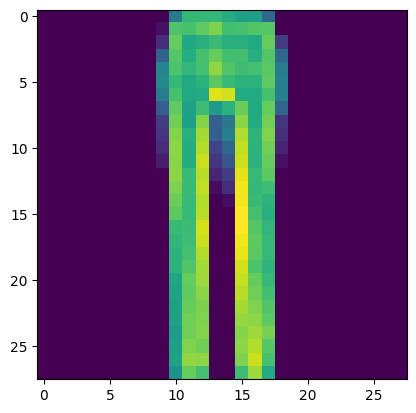

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[69])

In [ ]:
train_labels[69]

1

In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

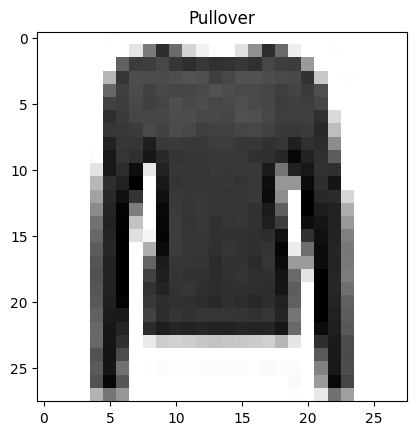

In [ ]:
index_choice = 5050
plt.imshow(train_data[index_choice],cmap=plt.cm.binary)
plt.title(labels[train_labels[index_choice]])
plt.show()

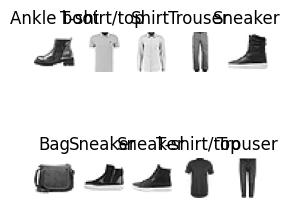

In [ ]:
import random
plt.figure(figsize = (3,3))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(labels[train_labels[rand_index]])
  plt.axis(False)

There are few things we gotta change 
1. Input shape
2. output functu

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
tf.random.set_seed(42)

#create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
non_norm_history = model_1.fit(train_data,
            train_labels,
            epochs=10,
            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3307 - accuracy: 0.0993 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2928 - accuracy: 0.1048 - val_loss: 2.2948 - val_accuracy: 0.1034
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2976 - accuracy: 0.1028 - val_loss: 2.2928 - val_accuracy: 0.1043
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2681 - accuracy: 0.1141 - val_loss: 2.2503 - val_accuracy: 0.1218
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2514 - accuracy: 0.1199 - val_loss: 2.2364 - val_accuracy: 0.1298
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2506 - accuracy: 0.1231 - val_loss: 2.2257 - val_accuracy: 0.1328
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2267 - accuracy: 0.1338 - val_loss: 2.1881 - val_accuracy:

In [ ]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.max(),train_data.min()

(255, 0)

In [ ]:
train_data_norm = train_data/255
train_data_norm.max()

1.0

In [ ]:
test_data.max()

255

In [ ]:
test_data_norm = test_data/255

In [ ]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit the model
norm_history = model_2.fit(train_data_norm,
            train_labels,
            epochs=10,
            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2066 - accuracy: 0.5572 - val_loss: 0.7227 - val_accuracy: 0.7492
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6660 - accuracy: 0.7656 - val_loss: 0.6765 - val_accuracy: 0.7682
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6230 - accuracy: 0.7790 - val_loss: 0.6381 - val_accuracy: 0.7792
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6027 - accuracy: 0.7853 - val_loss: 0.6167 - val_accuracy: 0.7837
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5899 - accuracy: 0.7898 - val_loss: 0.6308 - val_accuracy: 0.7775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5807 - accuracy: 0.7920 - val_loss: 0.6212 - val_accuracy: 0.7813
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5741 - accuracy: 0.7934 - val_loss: 0.6175 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

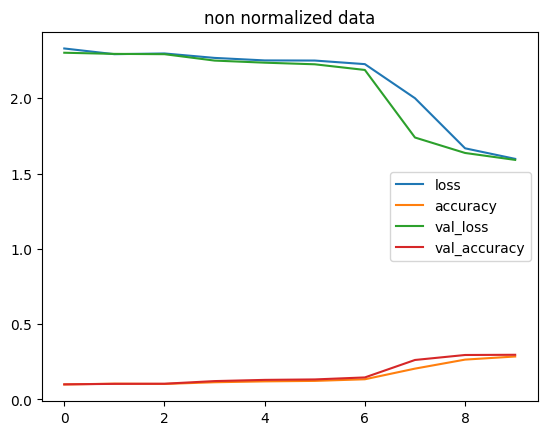

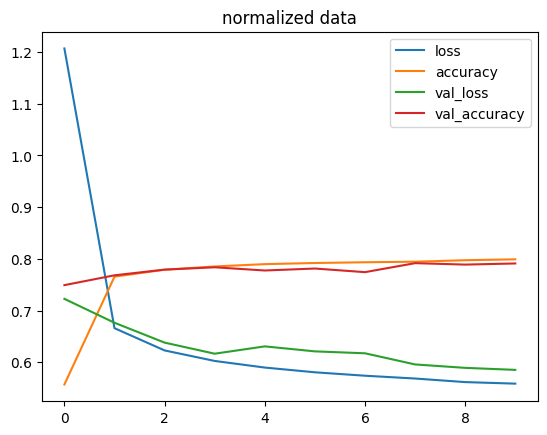

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")



In [ ]:
from keras.optimizers.schedules import learning_rate_schedule
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#fit the model
norm_history = model_3.fit(train_data_norm,
            train_labels,
            epochs=40,
            validation_data=(test_data_norm, test_labels),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2272 - accuracy: 0.5905 - val_loss: 0.8821 - val_accuracy: 0.7198 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7882 - accuracy: 0.7436 - val_loss: 0.7500 - val_accuracy: 0.7516 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6952 - accuracy: 0.7670 - val_loss: 0.6986 - val_accuracy: 0.7604 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6565 - accuracy: 0.7758 - val_loss: 0.6606 - val_accuracy: 0.7727 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6385 - accuracy: 0.7792 - val_loss: 0.6678 - val_accuracy: 0.7625 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6242 - accuracy: 0.7829 - val_loss: 0.6756 - val_accuracy: 0.7604 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s